# COMP3211 Assigment2 - Image Segmentation using K-Means

## Problem 1: K-means based Unsupservised Segmentation

### Importing the libraries and papreprocessing the data

(330, 500, 3)


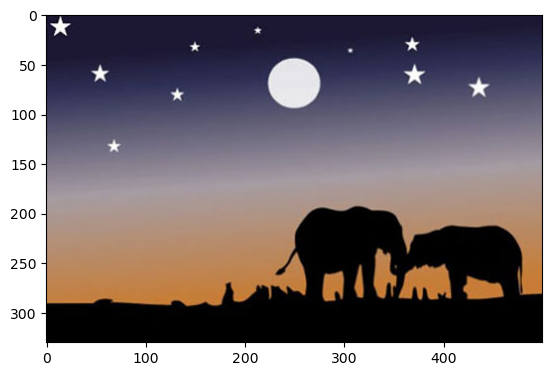

(165000, 3)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape

print(im.shape)
plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

### Q1. Implement your K-Means Clustering

## Q2.1 What kind of color are cluster centers presented?

In [47]:
def k_means_algorithm(n_clusters: int, all_pixels: np.ndarray):
    """
    Applies K-Means clustering on the provided pixel data to segment an image based on color attributes.

    Parameters:
    - n_clusters (int): The number of clusters or segments desired in the output.
    - all_pixels (np.ndarray): A 2D numpy array of shape (h x w, 3). Each row represents a pixel with its RGB values.

    Returns:
    - n_clusters: A numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels: A numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    """
    ######################## Your Implementation #############################
    column = all_pixels.shape[1]
    
    centroids_index = np.zeros((n_clusters, column), dtype=float)
    for i in range(n_clusters):   
        centroids_index[i] = all_pixels[np.random.choice(all_pixels.shape[0], replace=False)]
        
    labels = np.empty(len(all_pixels), dtype=int)
    mask = np.zeros((n_clusters, column), dtype=float)
    comp_cent = np.zeros((n_clusters, column), dtype=float)
    
    while True:
        
        for i in range(all_pixels.shape[0]):
            distance_min = float("inf")
            for j in range(n_clusters):
                distances = np.sqrt(np.sum((all_pixels[i] - centroids_index[j]) ** 2))
                if distance_min > distances:
                    distance_min = distances
                    labels[i] = j
                    
        for i in range(n_clusters):
            k = 0
            for j in range(all_pixels.shape[0]):
                if i == labels[j]:
                    k+=1
                    mask[i] += all_pixels[j]
            if k == 0:
                mask[i] = 0
                continue
            mask[i] = mask[i]/k
        
        centroids_index = mask

        new = 0
        for i in range(n_clusters):
            new = np.sqrt(np.sum((centroids_index[i] - comp_cent[i]) ** 2))

        comp_cent = centroids_index
        
        if abs(new) < 1e-3:
            break
            
    n_clusters = centroids_index
    ######################## End of Your Implementation ######################
    return n_clusters, labels

dominant_colors = 4
centers, labels = k_means_algorithm(dominant_colors, all_pixels)
print (centers)
# Convert to Integer format
centers = np.array(centers, dtype='uint8')

[[  1.43368045   0.8005441    1.12642085]
 [ 88.09408351  85.27880358 110.69576101]
 [ 35.08001771  32.105199    60.80848741]
 [171.15192711 143.27084297 128.83673863]]


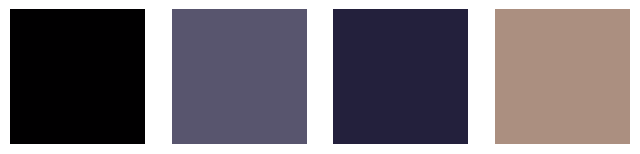

In [48]:
def analysis_colors_and_plot(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        plt.subplot(1,centers.shape[0],i)
        plt.axis("off")
        i+=1
        
        colors.append(each_col)
        
        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)
        
    plt.show()
    return colors

colors = analysis_colors_and_plot(centers)

### Show the segmented images

(165000, 3)


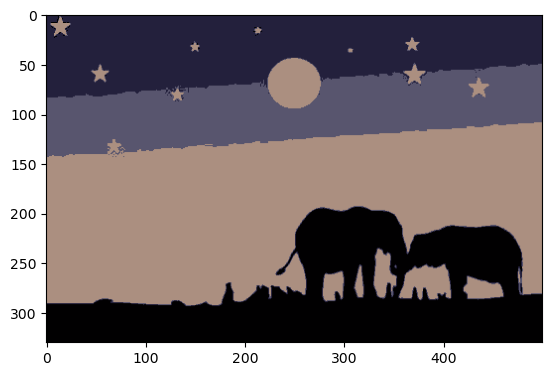

In [49]:
# Iterate over the image
def match_color_to_all_pixels(colors: list, labels: np.ndarray, new_img: np.ndarray, original_shape: tuple) -> np.ndarray:
    """
    Maps the cluster centroids (colors) to the original image pixels based on the labels.

    Parameters:
    - colors (list): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels (np.ndarray): A 1D numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    - new_img (np.ndarray): A numpy array to store the resultant segmented image. It should have the same shape as the original image.
    - original_shape (tuple): A tuple representing the original shape of the image, i.e., (h, w, 3).

    Returns:
    - np.ndarray: The resultant segmented image.
    """
    
    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[labels[ix]]
        
    new_img = new_img.reshape((original_shape))
      
    return new_img

width, height, chanles = im.shape
new_img = np.zeros((width*height,chanles),dtype='uint8')
print(new_img.shape)

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

plt.imshow(new_img)
plt.show()

### Q2.2 Please show the segmented images for different values of K = 2, 4, 6, 8, 10, draw in one line

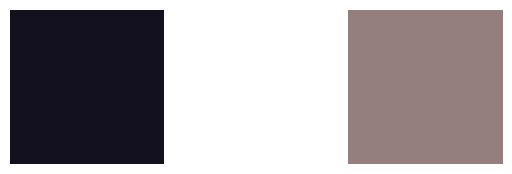

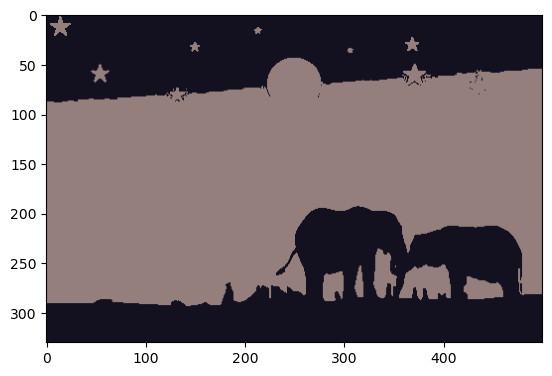

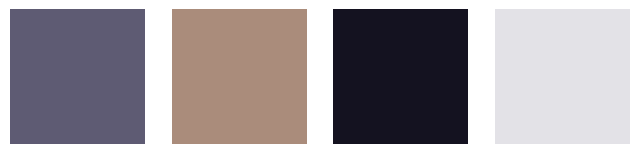

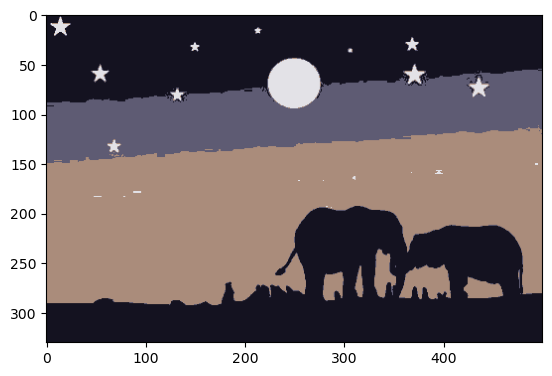

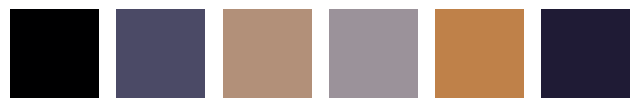

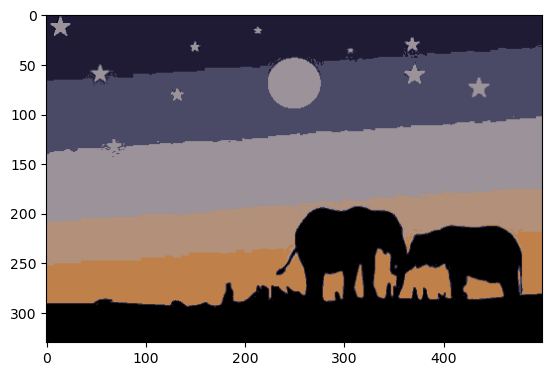

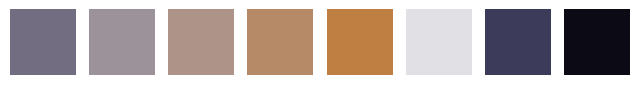

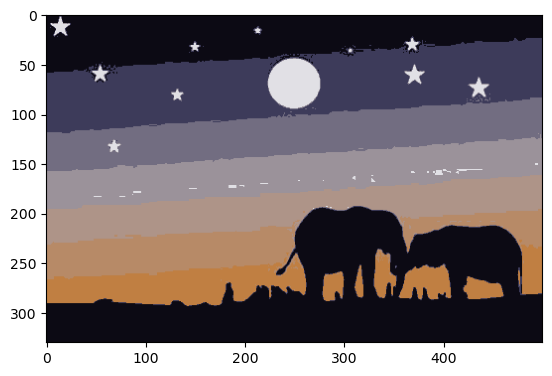

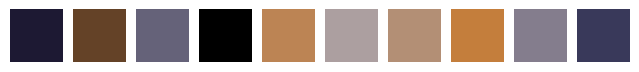

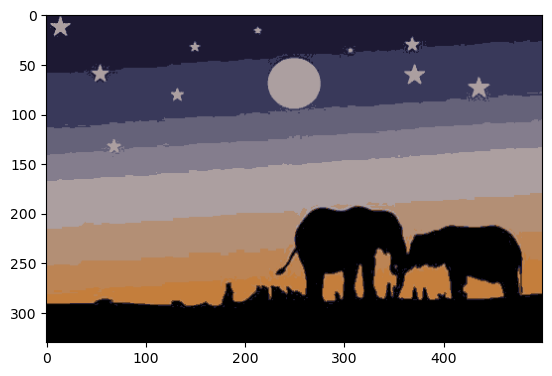

In [50]:
######################## Your Implementation #############################
for i in [2,4,6,8,10]:
    width, height, chanles = im.shape
    new_img = np.zeros((width*height,chanles),dtype='uint8')
    centers, labels = k_means_algorithm(i, all_pixels)
    centers = np.array(centers, dtype='uint8')
    colors = analysis_colors_and_plot(centers)
    new_img = np.zeros((width*height,chanles),dtype='uint8')
    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
    plt.imshow(new_img)
    plt.show()

######################## End of Your Implementation ######################

### Example for features and segmentation via FCN

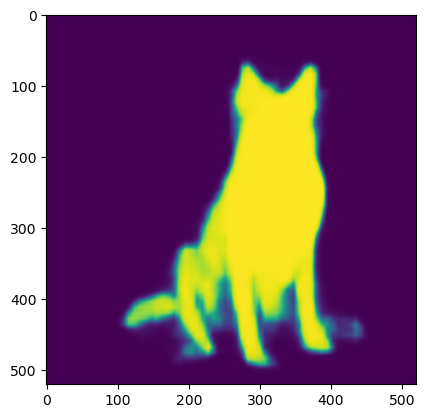

In [51]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image("./dog.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
mask_img = to_pil_image(mask)

plt.imshow(mask_img)

### Q3. Segment image via features from FCN and K-means, set K = 2, 4, 6, 8

In [64]:
from torch.nn import functional as F
import numpy as np

orginal_features = model.backbone(batch)["out"]
features = F.interpolate(orginal_features, size=img.shape[-2:], mode="bilinear", align_corners=False)
features = (features.squeeze(0).reshape((2048, -1))).permute(1, 0).detach().numpy() # Now, features is of shape (H*W, C), where C is learned features instead of colors

######################## Your Implementation #############################
centers, labels = k_means_algorithm(8, features) # more variations of color, since there are more clusters, put into diff segment
original_shape = img.shape
######################## End of Your Implementation ######################

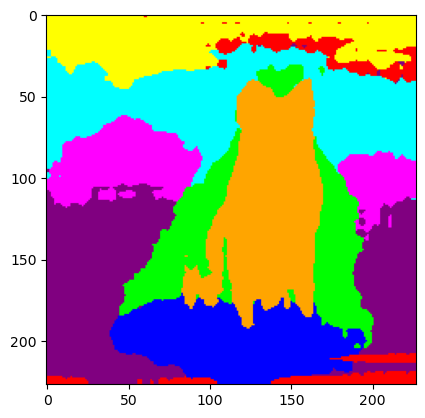

In [65]:
chanles, height, width  = img.shape
ogrinal_shape = (height, width, chanles)

new_img = np.zeros((width*height,chanles), dtype='uint8')

colors = [(255, 0, 0),    
          (0, 255, 0),   
          (0, 0, 255),   
          (255, 255, 0),  
          (255, 0, 255),  
          (0, 255, 255),  
          (128, 0, 128), 
          (255, 165, 0)] 

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
new_img = new_img.reshape((height, width, chanles))

plt.imshow(new_img)
plt.show()

## Problem 2: A* for Maze Searching (extra program file required)

In [66]:
import heapq
import math

def h1(node):
    return 0

def h2(node, goal):
    return abs(goal[0] - node[0]) + abs(goal[1] - node[1])

def h3(node, goal):
    return math.sqrt((goal[0] - node[0]) ** 2 + (goal[1] - node[1]) ** 2)
    
def paint(first, second, symbol):
    for i,j in second:
        first[i][j] = symbol

def a_star_algorithm(maze, start, goal):
    prio_que = []
    heapq.heappush(prio_que, (h2(start, goal), 0, start))
    came_from = {}
    g_score = {start: 0}
    closed_set = set()
    nodes1 = []

    nodes = [row[:] for row in maze]
    path = [row[:] for row in maze]
    #see until it breaks
    while prio_que:
        current_f, current_g, current_pos = heapq.heappop(prio_que)
        nodes1.append(current_pos)
        
        if current_pos == goal:
            path1 = [current_pos]
            while current_pos in came_from:
                current_pos = came_from[current_pos]
                path1.append(current_pos)
            path1.reverse()
            paint(path, path1, 2)
            paint(nodes, nodes1, 3)
            nodes.insert(0, [2,0,8,0,6,0,4,6])
            path.insert(0, [2,0,8,0,6,0,4,6])
            return path, nodes

        closed_set.add(current_pos)
        
        # see see all possible option
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current_pos[0] + dx, current_pos[1] + dy)

            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] == 0 and neighbor not in closed_set:
                temp_g_score = current_g + 1

                if temp_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current_pos
                    g_score[neighbor] = temp_g_score
                    f_score = temp_g_score + h2(neighbor, goal)
                    heapq.heappush(prio_que, (f_score, temp_g_score, neighbor))

    
    paint(nodes, nodes1, 3)   
    nodes.insert(0, [2,0,8,0,6,0,4,6])
    return [], nodes

maze = [
    [0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0]
]

path, nodes = a_star_algorithm(maze, (0, 0), (4, 4))
print(path)
print(nodes)


[[2, 0, 8, 0, 6, 0, 4, 6], [2, 1, 1, 1, 1], [2, 2, 0, 0, 0], [1, 2, 1, 1, 1], [1, 2, 2, 2, 2], [1, 0, 1, 0, 2]]
[[2, 0, 8, 0, 6, 0, 4, 6], [3, 1, 1, 1, 1], [3, 3, 3, 3, 3], [1, 3, 1, 1, 1], [1, 3, 3, 3, 3], [1, 3, 1, 3, 3]]
